# Praca Domowa 5
## Maciej Gryszkiewicz

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Import danych

In [4]:
df = pd.read_csv("clustering.csv", header=None)
df.head()

,0,1
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186


Ramkę danych odrazu zamieniamy na numpy ndarray, ułatwi to dalsze kroki.

In [13]:
df = df.values

### Definicja niezbędnych funkcji z zajęć

In [12]:
from sklearn.cluster import KMeans

def plot_kmeans_clusters(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')
    plt.title('K-means')
    plt.show()

In [6]:
def count_wcss_scores(X, k_max):
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1
        scores.append(wcss)
    return scores

In [10]:
def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

### Metoda KMeans

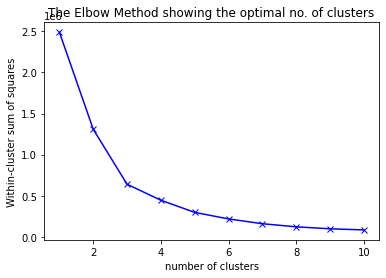

In [8]:
wcss_vec = count_wcss_scores(df, 10)
x_ticks = list(range(1, len(wcss_vec) + 1))
plt.plot(x_ticks, wcss_vec, 'bx-')
plt.xlabel('number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.title('The Elbow Method showing the optimal no. of clusters')
plt.show()

W tym wypadku, metoda łokcia nie pozwala na idealne oszacowanie odpowiedniej liczby klastrów. Z wykresu można wywnioskować, że powinna ona wynosić 3 lub 4.

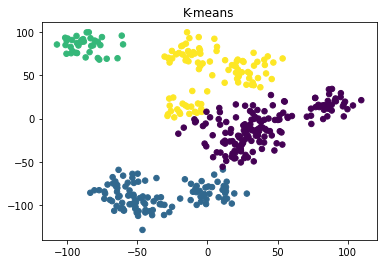

In [14]:
plot_kmeans_clusters(df, 4)

Wykres ten dla 4 klastrów wygląda OK, ale niektóre klastry wyglądają jakby składały się z kilku małych, oznacza to, że prawdopodobnie powinniśmy zwiększyć liczbę klastrów.

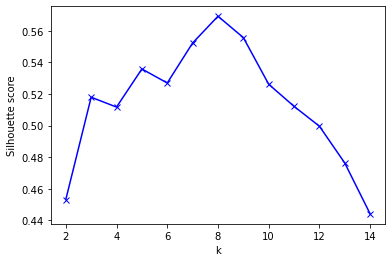

In [15]:
from sklearn.metrics import silhouette_score

cluster_num_seq = range(2, 15)
silhouette_vec = count_clustering_scores(df, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Tym razem widzimy jednoznacznie, że według metody Silhouette najbardziej odpowiednią ilością klastrów dla tego zbioru danych i dla tej metody klastrowania jest 8.

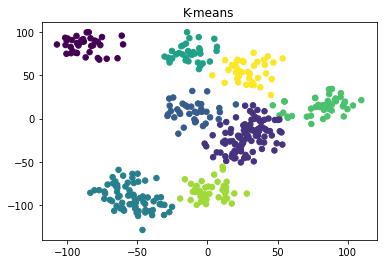

In [16]:
plot_kmeans_clusters(df, 8)

W tym wypadku zbiór danych został już podzielony na najmniejsze składowe, żaden klaster nie wygląda na zlepek kilku klastrów.

### Metoda Aglomeracyjna

Dla metody aglomeracyjnej również posłużymy się metodą Silhouette do wizualizacji odpowiedniej ilości klastrów, ale tym razem zamiast funkcji z zajęć użyjemy funkcji zawartej w pakiecie yellowbrick.

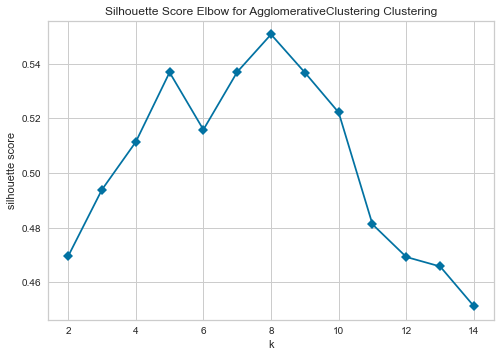

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [26]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering()

visualizer = KElbowVisualizer(
    model, k=(2,15), metric='silhouette', timings=False, locate_elbow=False
)

visualizer.fit(df)       
visualizer.show()

Dla tej metody również najbardziej optymalną liczbą klastrów jest 8.

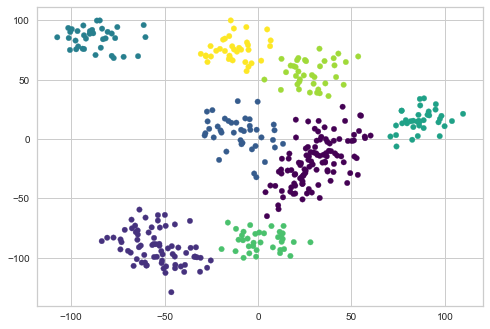

In [28]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=8)
y = model.fit_predict(df)
plt.scatter(df[:, 0], df[:, 1], c=y, s=30, cmap='viridis')
plt.show()

Na koniec, jako że jest to metoda aglomeracyjna możemy sporządzić dendrogram. Należy go przyciąć od dołu, aby był czytelny.

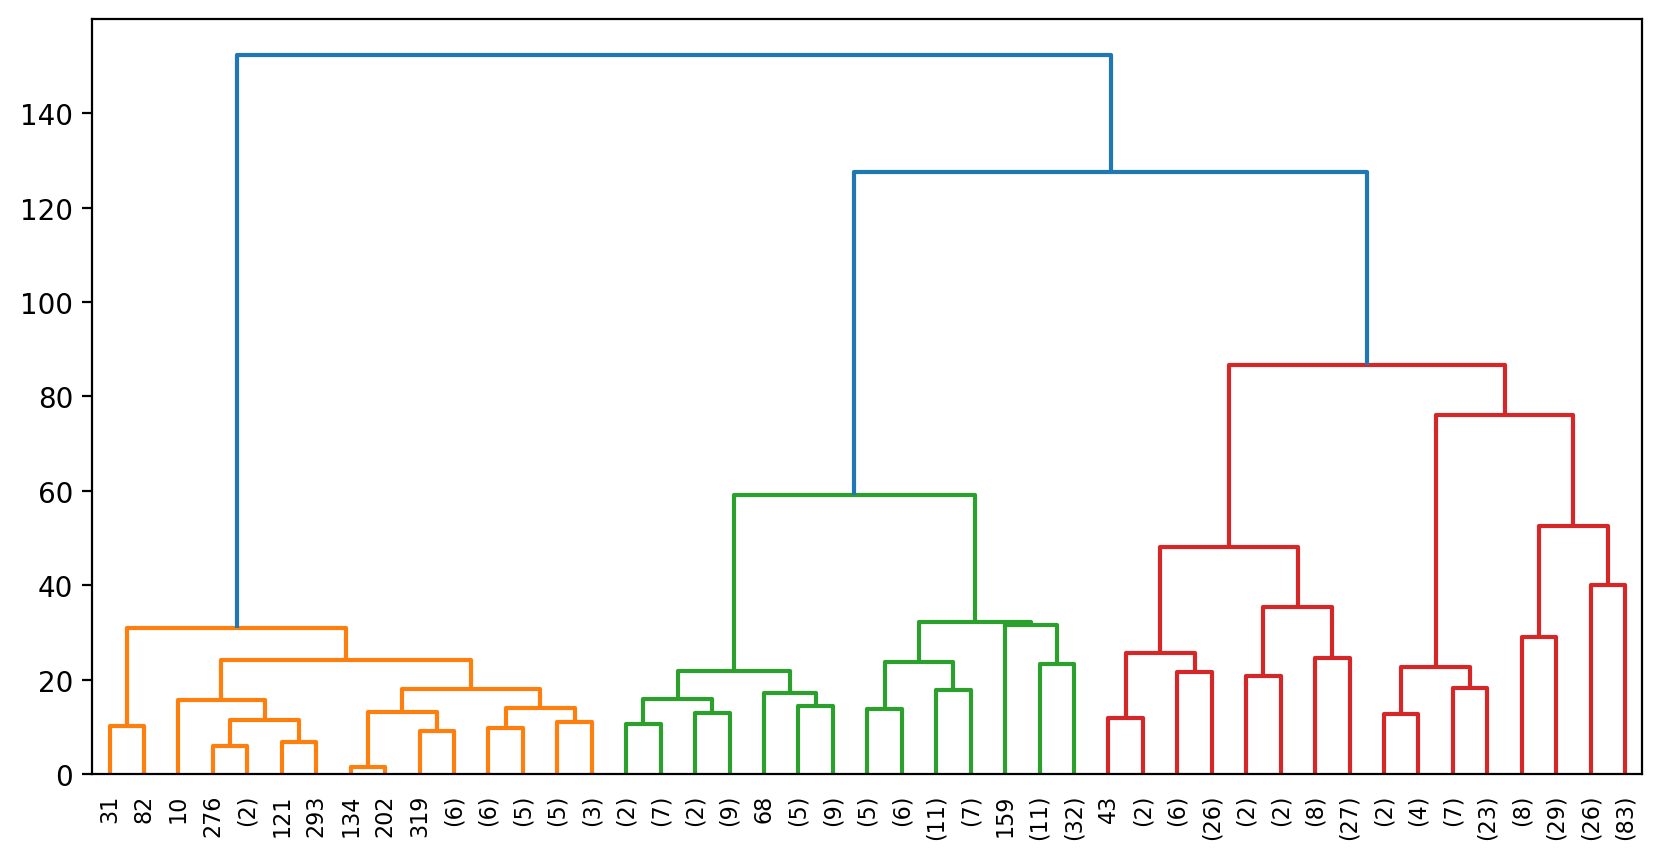

In [38]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(df.values, method='average')
plt.figure(figsize=(10, 5), dpi= 200, facecolor='w', edgecolor='k')
hierarchy.dendrogram(Z, 5, truncate_mode='level') #przycinamy dendrogram, żeby dało się z niego cokolwiek wyczytać
plt.show()